In [4]:
import numpy as np
import random
import time
from gyms.frozen_lake import FrozenLakeEnvJP


class SARSA:
    
    def __init__(self, env, learning_rate=0.1, discount_factor=0.99, exploration_rate=1.0, exploration_decay=0.99):
        self.env = env
        # Initialize the state-action matrix (Q-table) with zeros
        self.state_action_matrix = np.zeros((env.observation_space.n, env.action_space.n))
        self.learning_rate = learning_rate  # Alpha
        self.discount_factor = discount_factor  # Gamma
        self.exploration_rate = exploration_rate  # Epsilon (for exploration)
        self.exploration_decay = exploration_decay  # Epsilon decay

    def act(self, state):
        # Epsilon-greedy policy: with probability exploration_rate, choose a random action
        if random.uniform(0, 1) < self.exploration_rate:
            return self.env.action_space.sample()  # Random action
        else:
            # Choose the action with the highest Q-value  for the current state
            return self.predict(state)
    
    def predict(self, state):
        return np.argmax(self.state_action_matrix[state, :])

    def step(self, state, action, reward, next_state, done):
        next_action = self.act(state)
        td_target = reward + self.discount_factor * self.state_action_matrix[next_state, next_action]
        td_delta = td_target - self.state_action_matrix[state, action]
        self.state_action_matrix[state, action] += self.learning_rate * td_delta

        # Decay exploration rate
        if done:
            self.exploration_rate *= self.exploration_decay
        
        return next_action



In [5]:
# Create the FrozenLake environment
env = FrozenLakeEnvJP()

# one episode

In [6]:
# Initialize the QLearning strategy
strategy = SARSA(env)

# Reset the environment to the initial state
state = env.reset()[0]

# Render the initial state (not in the FrozenLakeV1 class but showing how to work with Q-Learning)
env.render(step_number=0)
action = strategy.act(state)  # Select action based on the current state

# Play the game by following the Q-Learning strategy
for step in range(100):
    
    next_state, reward, done, truncated, info = env.step(action)  # Apply the action to the environment
    
    # Render the updated environment after each action
    env.render(step_number=step+1)

    # Update the Q-Learning state-action matrix
    next_action = strategy.step(state, action, reward, next_state, done)
    
    # Transition to the next state
    state = next_state
    action = next_action

    if done or truncated:
        print("Game Over!")
        time.sleep(1)
        break

# Close the environment
env.close()


Game Over!


# Multiple Episodes

In [8]:
# Initialize the QLearning strategy
strategy = SARSA(env, exploration_rate=0.2, learning_rate=0.7)

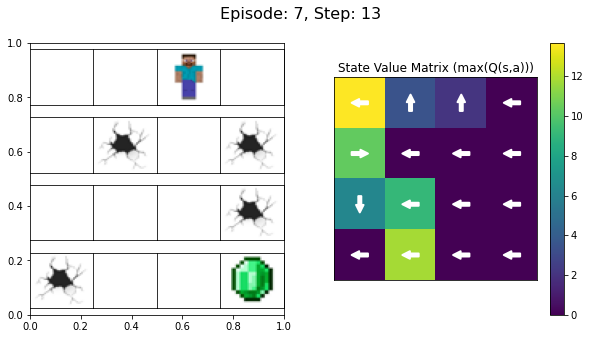

In [ ]:
# Define number of episodes
num_episodes = 30
max_steps_per_episode = 100

# Track the rewards per episode (optional)
episode_rewards = []

for episode in range(num_episodes):
    # Reset the environment to the initial state at the start of each episode
    state = env.reset()[0]  # Extract the actual state from the reset
    action = strategy.act(state)  # Select action based on the current state
    
    total_reward = 0  # Initialize the reward tracker for this episode

    # Play the game by following the Q-Learning strategy
    for step in range(max_steps_per_episode):
        next_state, reward, done, truncated, info = env.step(action)  # Apply the action to the environment

        if done and reward == 1:
            reward = 200
        elif done:
            reward = 0
        else:
            reward = next_state

        # Update the Q-Learning state-action matrix
        next_action = strategy.step(state, action, reward, next_state, done)
        
        # Render the updated environment after each action (optional for multiple episodes)
        env.render2(strategy.state_action_matrix, step_number=step+1, episode_number=episode+1)
        
        # Transition to the next state
        state = next_state
        action = next_action
        
        total_reward += reward  # Accumulate the reward

        if done:
            print(f"Episode {episode + 1} done in {step + 1} steps with total reward: {total_reward}")
            time.sleep(1)
            break
        if truncated:
            print(f"Episode {episode + 1} finished in {step + 1} steps with total reward: {total_reward}")
            time.sleep(1)
            break

    # Log the total reward for this episode
    episode_rewards.append(total_reward)

# Close the environment after all episodes
env.close()



In [ ]:
# Optional: Analyze performance over episodes
import matplotlib.pyplot as plt

# Plot the total reward over time to see the agent's improvement
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode in FrozenLake')
plt.show()